# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")



***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

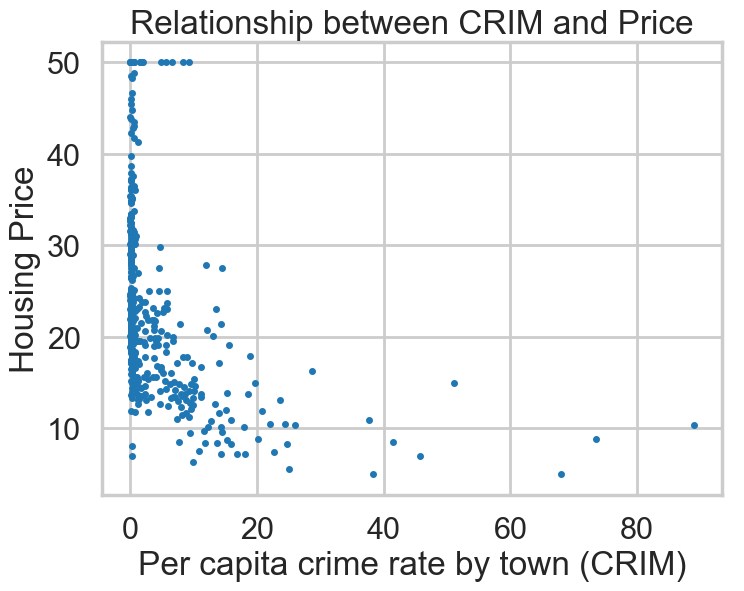

In [18]:
rcParams['lines.markersize'] = 3
rcParams["figure.figsize"] = [8,6]
rcParams["figure.dpi"] =100

plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<b>Que :</b>What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>
<b>Ans :</b> I can see that as the crime rate increase housing price decresases. There seems to be a non linear negative relationship.


<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>
<b>Ans :</b> I can see that as the crime rate increase housing price decresases. There seems to be a non linear negative relationship.


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

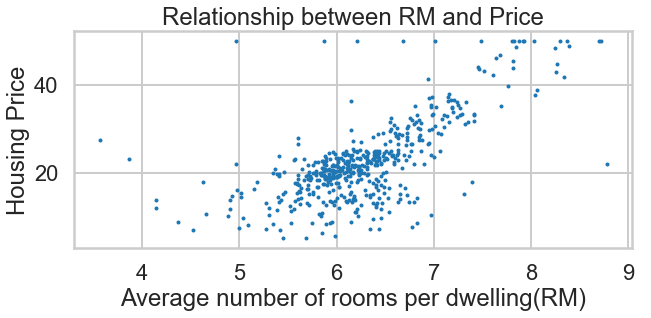

In [28]:
#scatter plot between *RM* and *PRICE*
rcParams['lines.markersize'] = 2
rcParams["figure.figsize"] = [10,4]
rcParams["figure.dpi"] =72
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling(RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()


**Relationship Between RM and Housing Price:**

<b>Ans :</b> There seems to be a positive relation between Number of room and Housing price. There are few points where number of romms are very less but housing price is high. They seems to be outlier. Lets see those

In [14]:
bos[(bos['RM']<4) & (bos['PRICE']>20)]
#These 2 records seem to be an outlier. But they could be expensive because of some other factor like Crime in the area.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1


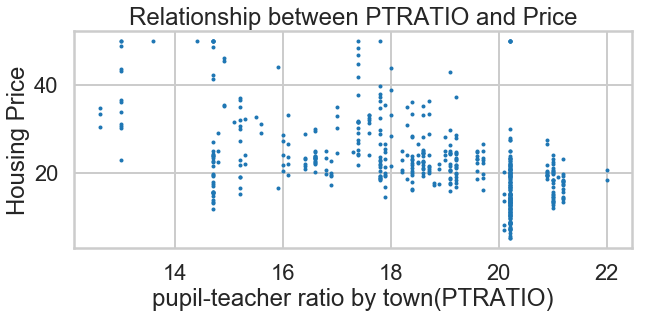

In [29]:
#scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("pupil-teacher ratio by town(PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show()

**Relationship Between PTRATIO and Housing Price:**

<b>Ans :</b> There seems to be no relation between PTRATIO and Housing price. 

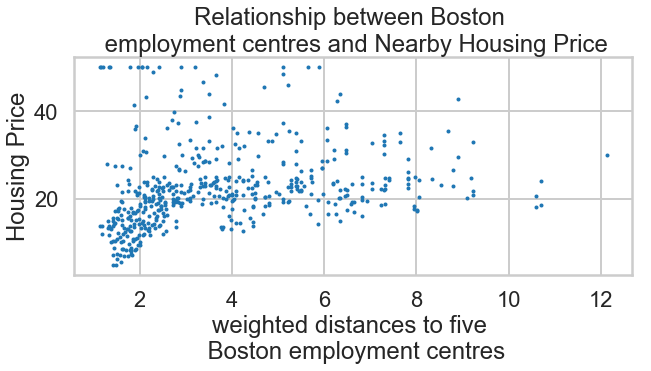

In [30]:
# weighted distances to five Boston employment centres

plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("weighted distances to five \n Boston employment centres")
plt.ylabel("Housing Price")
plt.title("Relationship between Boston \n employment centres and Nearby Housing Price")
plt.show()

# positive realtionship

**Relationship between weighted distance to five Boston employment centres and Housing Price:** 

There is non-linear relationship between the two variables.

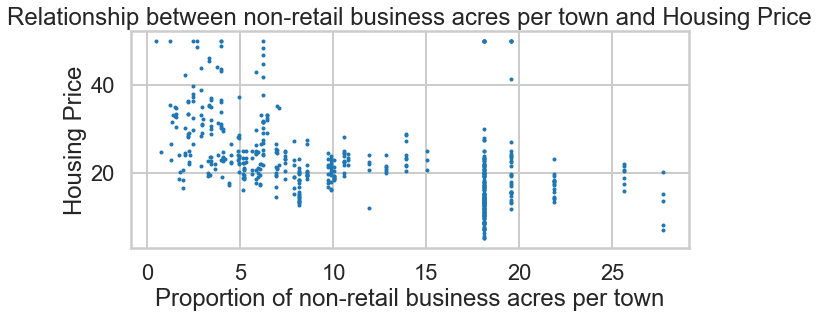

In [33]:
# proportion of non-retail business acres per town
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Housing Price")
plt.title("Relationship between non-retail business acres per town and Housing Price")
plt.show()

**Relationship Between proportion of non-retail business acres per town and housing price:** 

There is negative relationship bwtween non-retail business acres per town and housing price, as the number of proportion of non-retail business acres per town increases, the housing price decreases.

Text(0.5,1,'Relationship between TAX and Price')

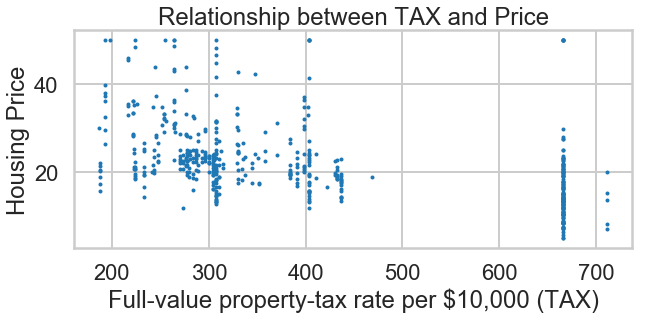

In [34]:
plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel("Full-value property-tax rate per $10,000 (TAX)")
plt.ylabel("Housing Price")
plt.title("Relationship between TAX and Price")

The TAX and PRICE have a similar plot as the PTRATIO and PRICE where certain pockets of TAX have a low to high PRICE ranges. But the majority of the sample population is towards the low TAX and lower PRICE.

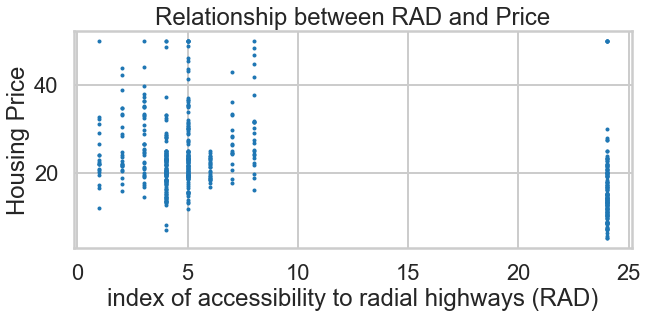

In [36]:
plt.scatter(bos.RAD, bos.PRICE)
plt.xlabel("index of accessibility to radial highways (RAD)")
plt.ylabel("Housing Price")
plt.title("Relationship between RAD and Price")
plt.show()

THE RAD vs PRICE plot shows that certain RAD indexes can demand low to higher range of PRICES, these probably coincide with the highways and where they lead to in term of favorite accessible locations that are sought after by the housing market.

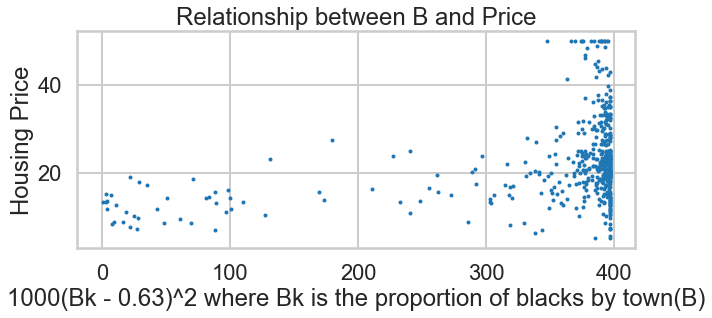

In [38]:
plt.scatter(bos.B, bos.PRICE)
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town(B)")
plt.ylabel("Housing Price")
plt.title("Relationship between B and Price")
plt.show()

In [40]:
# Calculating the Bk value to understand metric better
bos['Bk'] = [(((blackpop/ 1000)**0.5) + 0.63) for blackpop in bos['B']]

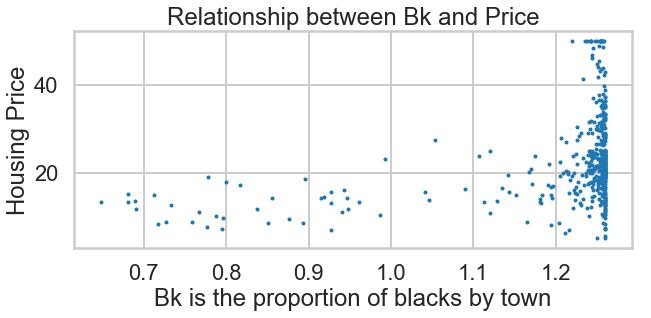

In [42]:
plt.scatter(bos.Bk, bos.PRICE)
plt.xlabel("Bk is the proportion of blacks by town")
plt.ylabel("Housing Price")
plt.title("Relationship between Bk and Price")
plt.show()

**The Bk vs PRICE graph shows there is a distinct difference in lower than 1.0 Bk and PRICE values since the prices are lower with mixed population but as the value of Bk goes above 1.0 there is a concentration at about 1.25 where housing is priced anywhere from LOW to HIGH.**

The above observation is made dependent of the data provided and there could be some influencing factors that are hidden and unknown at the present time.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

In [81]:
rcParams['lines.markersize'] = 3
rcParams["figure.figsize"] = [6,6]
rcParams["figure.dpi"] =100

C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


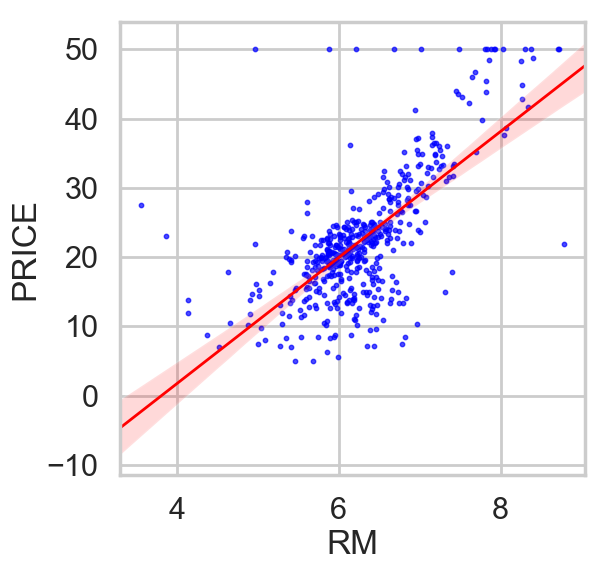

In [57]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True,line_kws={"color": "red","linewidth":2},
            scatter_kws={"s": 10, "alpha": 0.7, "color": 'blue'})
plt.show()

### Histograms
***


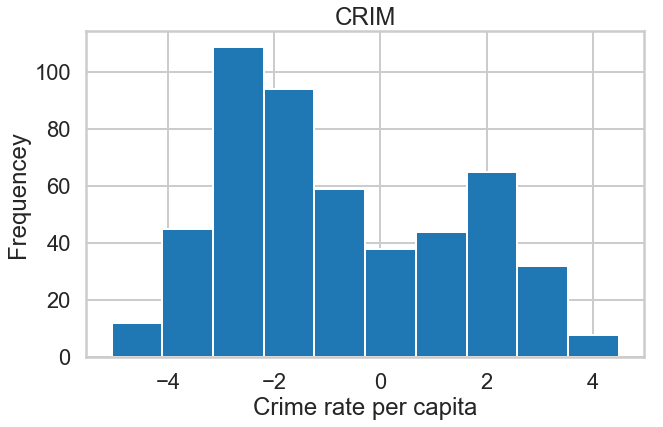

In [60]:
rcParams["figure.figsize"] = [10,6]
rcParams["figure.dpi"] =72
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

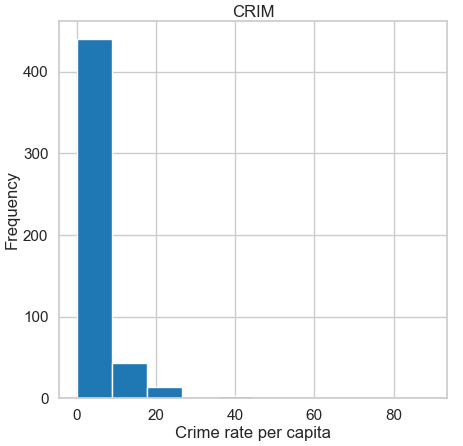

In [63]:
rcParams["figure.figsize"] = [10,10]
rcParams["figure.dpi"] =50
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()


The purpose of taking the log is transformation of the CRIM data in order to remove the highly clustered data in the 0-10 CRIM rate range. The data is skewed and this transformation helps to remove this skewness. The data shows a more normal distribution after the transformation which is not apparent without the transformation.

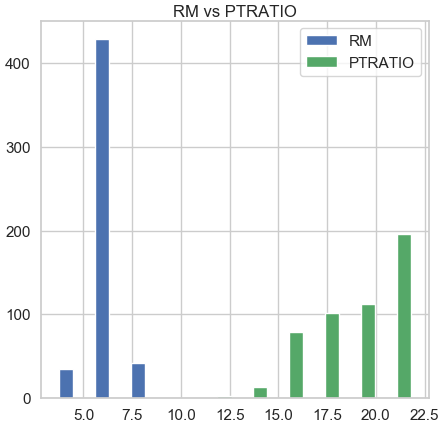

In [64]:
plt.style.use('seaborn-deep')

x = bos.RM 
y = bos.PTRATIO  
bins = np.linspace(0,10,20, 30)

plt.hist([x, y],label= ['RM', 'PTRATIO'])
plt.legend(loc='upper right')
plt.title("RM vs PTRATIO")
plt.show()

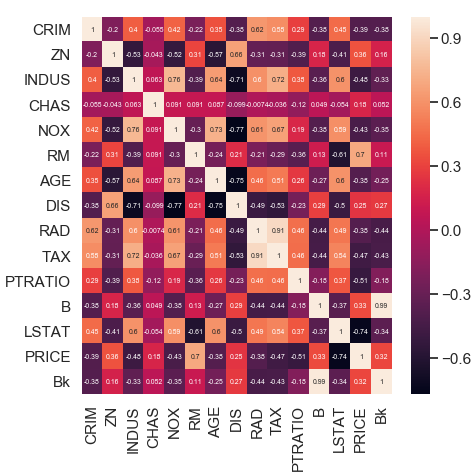

In [78]:
cor = bos.corr()
sns.heatmap(cor, annot=True)

# There seems to be a strong positive correlation between RAD & NOX, INDUS & NOX, INDUS & TAX, NOX & TAX. 
#It shows that NOX TAX and INDUS are interrelated
#Regression is very sensitive to Collinearity, so we should remove 2 of these to get the  better results

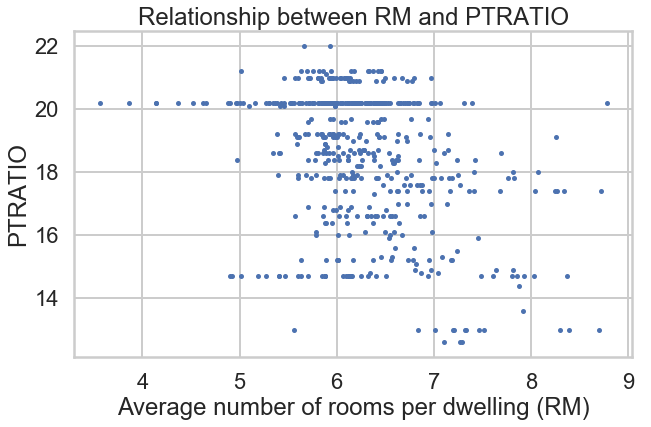

In [84]:
rcParams['lines.markersize'] = 3
rcParams["figure.figsize"] = [10,6]
rcParams["figure.dpi"] =72
plt.scatter(bos.RM, bos.PTRATIO)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("PTRATIO")
plt.title("Relationship between RM and PTRATIO")
plt.show()

**The maximum sample population is at the highest PTRATIO, showing that the Bostonians prefer having more teachers and maybe willing to pay a higher housing PRICE for sucha perk. The correlation between Rooms and PTRATIO is that the most rooms in houses i.e. 6 is also prefered, showing that the population that likes the higher pTRATIO also prefers greater number of rooms in their houses.**

**The above is an assumption but for the most part RM and PTRATIO are variables that are independent of each other.**

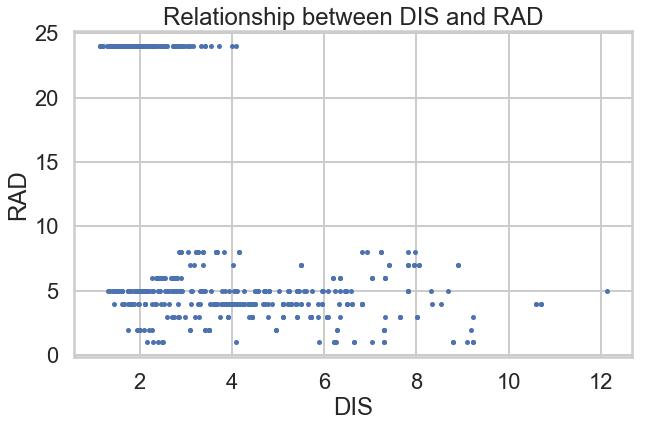

In [86]:
plt.scatter(bos.DIS, bos.RAD)
plt.xlabel("DIS")
plt.ylabel("RAD")
plt.title("Relationship between DIS and RAD")
plt.show()

**The above relationship between DIS (distances to the 5 employment centres) and RAD the index of accessibility to the radial highways shows that the DIS plot in blue follows a right-tail distribution whereas the RAD plot in green is mostly a normal distribution. The DIS and RAD maybe related in the sense that most of the housing market had reasonable accesibility to the emplyment centers due to the accessibility to the radial highways and reducing the commute time to maybe cause these2 factors to be a reason for higher housing prices.**

**The above is an assumption but for the most part DIS and RAD are variables that are independent of each other.**

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [87]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [88]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           2.49e-74
Time:                        18:39:02   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

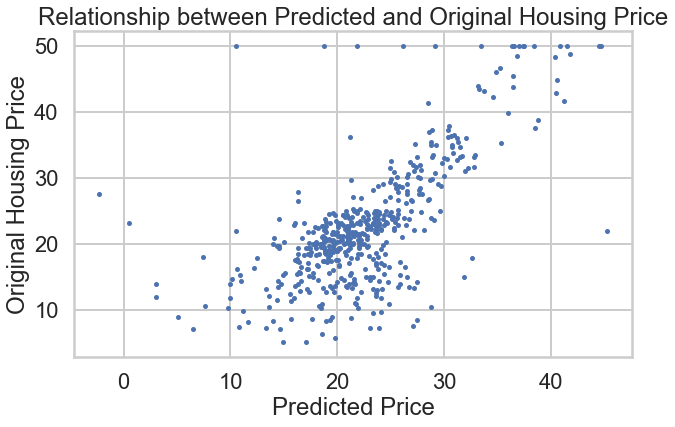

In [91]:
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Price")
plt.ylabel("Original Housing Price")
plt.title("Relationship between Predicted and Original Housing Price")
plt.show()

C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


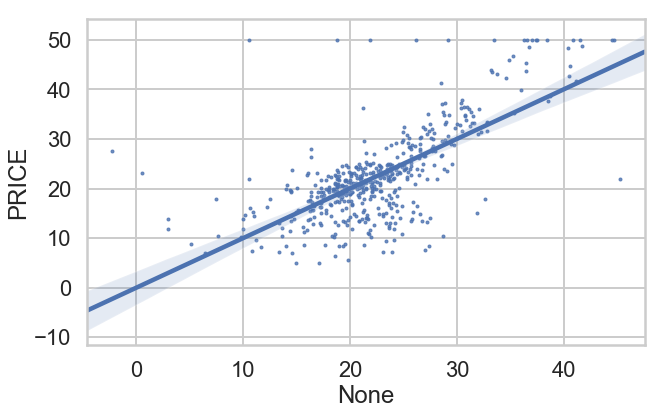

In [114]:
sns.regplot(y=bos.PRICE, x=m.fittedvalues, data=bos, fit_reg = True)

The plot proves that there is a linear relationship between predicted and original housing prices, but the wierdness is in the fact that there are some outliers that are negative or near-zero predicted prices. There is also a ceiling in the original housing prices at 50 which could be for a reason which is unknown at this time. Additionally there are some outliers in the 40+ range of the predicted prices.

In [94]:
bos1 = bos
bos1['pricehat'] = m.fittedvalues
bos1[(bos1['RM']<4) & (bos1['PRICE']>20)]
# 365th row was identified as the outlier and here it is giving the predicted value as negative. 
#It confirms that it is an outlier

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Bk,pricehat
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,1.225567,-2.258011
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,0.992519,0.490826


### Fitting Linear Regression using `sklearn`


In [129]:
from sklearn.linear_model import LinearRegression
X = bos.drop(['PRICE','Bk'], axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [143]:
# Look inside lm object
# Use all 13 predictors to fit linear regression model
lm.fit(X,bos.PRICE)
print(lm.coef_)
print(lm.intercept_)
print(lm.score(X,bos.PRICE))

[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]
36.491103280361344
0.7406077428649427


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [131]:
# setting the fit_intercept = False
lm_no_intrcpt = LinearRegression(fit_intercept=False)
lm_no_intrcpt.fit(X, bos.PRICE) # fitting the model
print('Estimated intercept coefficient: {}'.format(lm_no_intrcpt.intercept_))

Estimated intercept coefficient: 0.0


**Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not?**

Changing the model will be as follows to not fit an intercept term: m = ols('PRICE ~ RM -1',bos).fit()

Dropping the intercept in a linear regression model makes the predictor’s coefficient stronger and more significant. Dropping the intercept in a regression model forces the regression line to go through the origin–the y intercept must be 0. The problem with dropping the intercept is if the slope is steeper just because you’re forcing the line through the origin, not because it fits the data better. If the intercept really should be something else, you’re creating that steepness artificially. A more significant model isn’t better if it’s inaccurate.

The constant term is in part estimated by the omission of predictors from a regression analysis. In essence, it serves as a garbage bin for any bias that is not accounted for by the terms in the model. You can picture this by imagining that the regression line floats up and down (by adjusting the constant) to a point where the mean of the residuals is zero, which is a key assumption for residual analysis. This floating is not based on what makes sense for the constant, but rather what works mathematically to produce that zero mean.

The constant guarantees that the residuals don’t have an overall positive or negative bias, but also makes it harder to interpret the value of the constant because it absorbs the bias.

So overall the recommendation would be to not drop the constant.


**Exercise:One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.**

As seen above that the RM and PTRATIO and the DIS and RAD as histogram plots show that that for the most part all (X) independent variables are indenpendent of each other and they are normally distributed.

A more technical definition of an IID statistics is that random variables X1, X2, . . . , Xn are IID if they share the same probability distribution and are independent events. Sharing the same probability distribution means that if you plotted all of the variables together, they would resemble some kind of distribution: a uniform distribution, a normal distribution or any one of the dozens of other distributions.

Each distribution has it’s own characteristics. Let’s say we are looking at a sample of n random variables, X1, X2,…, Xn. Since they are IID, each variable Xi has the same mean (μ), and variance(σ)2. In equation form, that’s: E(Xi) = μ ; Var(Xi) = σ2 for all i = 1, 2,…, n. Random variables that are identically distributed don’t necessarily have to have the same probability. A flipped coin can be modeled by a binomial distribution and generally has a 50% chance of a heads (or tails). But let’s say the coin was weighted so that the probability of a heads was 49.5% and tails was 50.5%. Although the coin flips are IID, they do not have equal probabilities. The errors should also be randomly distributed.

**Exercise: True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.**

False: To use linear regression, 'Y' need not to be normally distributed. The normal distribution assumption is made for the residual(error) and not the variables(target).

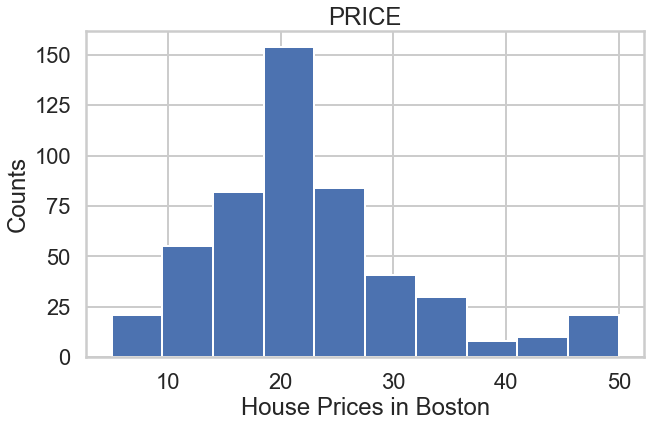

In [132]:
plt.hist(bos.PRICE)
plt.title("PRICE")
plt.xlabel("House Prices in Boston")
plt.ylabel("Counts")
plt.show()

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [133]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280361344


In [134]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [135]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [136]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

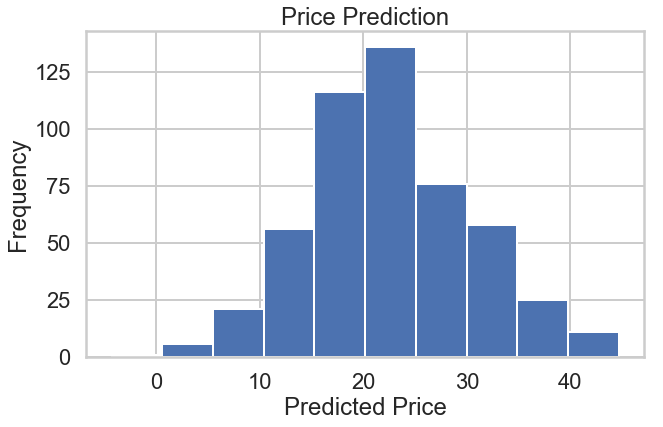

In [137]:
plt.hist(lm.predict(X))
plt.title('Price Prediction')
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')
plt.show()


Description of the histogram: The histogram looks normal which means that the data is distributed on both side of the mean. Most of the data are near the mean(center of the distribution). There seems to be outliers and must be investigated.

C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


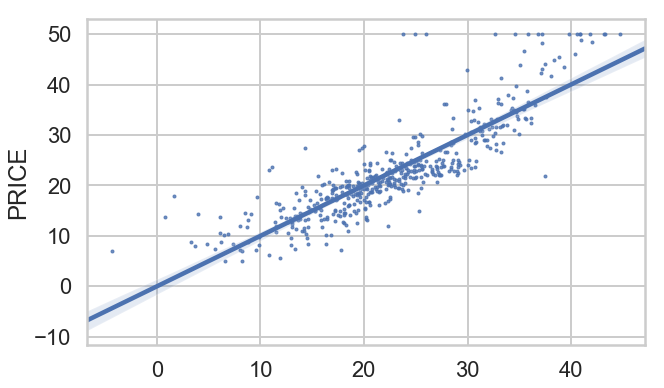

In [139]:
# Scatter plot with model created using sklearn.
sns.regplot(y=bos.PRICE, x=lm.predict(X), data=bos, fit_reg = True)

In [140]:
print(lm.score(X, bos.PRICE))

0.7406077428649427


The statsmodel is very useful if we want to do statistical anaysis, as t-value, p-value and other details can be obtained very easily. However to get the same statistics we may need more line of code to calculate these values in sklearn. Where as if we want to do machine leaning and create models we should use sklean which has rich libraries to support models and predict target variables.

Sklearn provides better prediction than that of Statsmodels. The $R^2$ result of sklearn gives 74% which is lot better than 48% of statsmodel.

Outliers are better taken care in sklearn than Statsmodels.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [141]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149875


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [145]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

9.338093633899414e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [147]:
# taking variable PTRATIO_X to store only PTRATIO(Pupil-Teachers ratio) feature.
PTRATIO_X = X[['PTRATIO']]

# Creating a model obleject lm_PTRATIO
lm_PTRATIO = LinearRegression()

# fitting our data into the model.
lm_PTRATIO.fit(PTRATIO_X, bos.PRICE)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [148]:
# printing intercept coefficient.
print('Estimated intercept coefficient: {}'.format(lm_PTRATIO.intercept_))

Estimated intercept coefficient: 62.34462747483266


In [150]:
# printing coefficient
print('Coefficients: {}'.format(lm_PTRATIO.coef_))

Coefficients: [-2.1571753]


In [151]:
# Will create the OLS model as well, to cross verify the coefficients and intercept and will
# and will also be able to get more statistics which can be used to evaluate the model later.

PTRATIO = ols('PRICE~PTRATIO', bos).fit()
print(PTRATIO.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.61e-34
Time:                        21:13:00   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [154]:
# compute the R-Squared value in the sklearn model as we already have R-squared value from OLS model.
print("R-Squared =", lm_PTRATIO.score(PTRATIO_X,bos.PRICE))

R-Squared = 0.257847318009223


C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


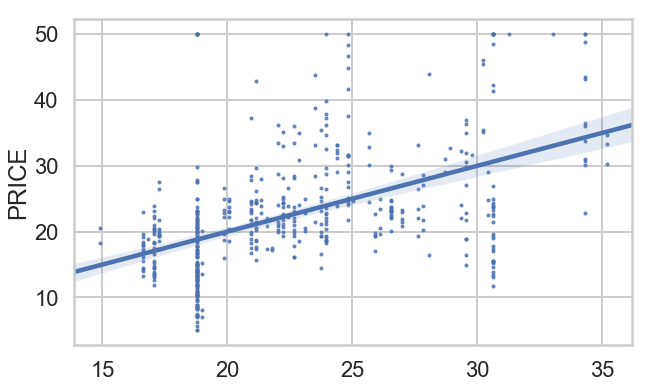

In [155]:
sns.regplot(y=bos.PRICE, x=lm_PTRATIO.predict(PTRATIO_X), data=bos, fit_reg = True)

F-stats calculation

In [156]:
# We should be using the the expression TSS = ESS + RSS
# TSS = Total sum of squares.
# ESS = Explained sum of squares.
# RSS = Residual sum of Squares.

# calculating  RSS:
RSS = (np.sum((bos.PRICE - lm_PTRATIO.predict(PTRATIO_X)) ** 2))
print(RSS)

31702.01320696725


In [158]:
# Calculating ESS:
ESS = (np.sum(lm_PTRATIO.predict(PTRATIO_X) - np.mean(bos.PRICE)) ** 2)
print(ESS)

1.724186901032895e-22


In [159]:
# calculating Total Sum of Squares TSS:
TSS = ESS + RSS
print (TSS)

31702.01320696725


In [160]:
R_sqrd = ESS/TSS
print(R_sqrd)

5.4387299941379276e-27


In [161]:
# now calculating MSE and MSR
# MSE = ESS/K, where K is the number of variables. In our case it would be only one.
K = 1
#print(K)

MSE = ESS/K
print(MSE)

1.724186901032895e-22


In [162]:
# MSR = RSS/(N-K-1), where N is the number of obesrvation and K is number of variable.
N = len(PTRATIO_X)
MSR = RSS/(N-K-1)
print(MSR)

62.90081985509375


In [163]:
# since we have MSE and MSR, we can calculate F stats
# using the expression F = MSR/MSE
F = MSR/MSE
print(F)

3.648143934825874e+23


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [165]:
# will create a OLS object named CRP(CRIM, RM, PTRATIO).
CRP = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(CRP.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.09e-97
Time:                        21:17:43   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

In [166]:
# will create linear model using sklearn.
CRP_X = X[['CRIM','RM','PTRATIO']]
CRP_lm = LinearRegression()

In [167]:
# fitting the model
CRP_lm.fit(CRP_X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

F-statistics: As we know the F-statistic is used to test the overall model. One way to look at it is to look for p-value and from the above summary we can see all the three independent variables have 0(zero) value, hence we can conclude that the regression model fits the data better than the model with no independent variables.

$R^2$ - Statistics: This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. From the above statistics we can say that there is 59.43% of the variance in housing prices with the three independed variables.

I think the RM(Average numbers of room per dwelling) independent variable is the most significant variable in predicting the housing price. We can see the coefficient of RM is in positive and hence the positive realtionship. Means the increase in RM variable will increase in the price of a house.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [169]:
# Will add below two new variables to my model and will name the model as 
# 1. ZN     -  proportion of residential land zoned for lots over 25,000 sq.ft.
# 2. INDUS  -  proportion of non-retail business acres per town

# will create a OLS object named CRPDR(CRIM, RM, PTRATIO, INDUS, ZN).
CRPIZ = ols('PRICE ~ CRIM + RM + PTRATIO + INDUS + ZN',bos).fit()
print(CRPIZ.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           2.13e-98
Time:                        21:20:55   Log-Likelihood:                -1605.3
No. Observations:                 506   AIC:                             3223.
Df Residuals:                     500   BIC:                             3248.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2341      4.101     -0.301      0.7

In [170]:
# will create the linear model using sklearn.
# will call the model CRPIZ_X(CRIM, RM, PTRATIO, INDUS, ZN)
CRPIZ_X = X[['CRIM','RM','PTRATIO','INDUS','ZN']]
CRPIZ_lm = LinearRegression()
CRPIZ_lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [171]:
# fitting the model
CRPIZ_lm.fit(CRPIZ_X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [172]:
# finding the score
CRPIZ_lm.score(CRPIZ_X, bos.PRICE)

0.604896145825035

In [173]:

# will conpute F value using the formula given in the section F-test revisted.
# we have the two models as below
# 1. CRP_lm(Reduced model or subset of full model)
# 2. CRPIZ_lm(full model)
# below are the terminology which will be used for the same.
# RSS_full: RSS for the full model
# RSS_redu: RSS for the subset of full model
# DF_full: Degree of freedom associated with residual error for the full model
# DF_redu: Degree of freedom associated with residula error for the subset model
# DF values will be calculated using the formula N-K-1, where N is the number of observation,
# K is the number of variables.

RSS_redu = (np.sum((bos.PRICE - CRP_lm.predict(CRP_X)) ** 2))
RSS_full = (np.sum((bos.PRICE - CRPIZ_lm.predict(CRPIZ_X)) ** 2))

print("RSS for full model = {} and RSS for subset model = {}".format(RSS_full, RSS_redu))
#print('Number of observation = ',N)

DF_redu = N - 3 -1 # number of variables in the subset or reduced model is 3
DF_full = N - 5 -1 # number of variables in the full model is 5
# print(DF_redu, DF_full)

# Calculation of F
F = ((RSS_redu - RSS_full)/(DF_redu - DF_full))/(RSS_full/DF_full)
print("F-stats F:",F)

RSS for full model = 16877.372954550694 and RSS for subset model = 17367.841061728686
F-stats F: 7.265172555272384


As we have seen in the ols summary AIC with two more variable is less than that of model with 3 variables which means that the model with the 5 variables is better fitting model.

In [185]:
model_all = ols('PRICE ~ CRIM +TAX+NOX +RM + PTRATIO + INDUS + ZN + B + RAD + DIS + AGE+ CHAS +LSTAT',bos).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 03 Feb 2019   Prob (F-statistic):          6.95e-135
Time:                        21:36:43   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

INDUS and AGE dont seem to be a significant variables. We should not include them im our model

In [186]:
model_some = ols('PRICE ~ CRIM +TAX+NOX +RM + PTRATIO + ZN + B + RAD + DIS + CHAS +LSTAT',bos).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 03 Feb 2019   Prob (F-statistic):          6.95e-135
Time:                        21:36:55   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

Adjusted RSquare got better after removing those 2 variables We got the best model with RSquare as .741 and least AIC as 3022


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

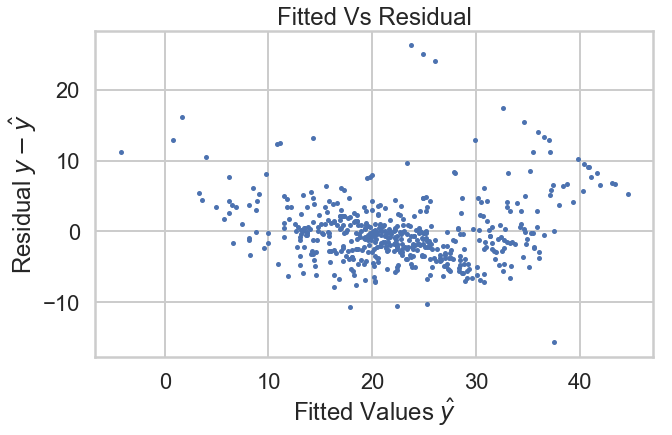

In [188]:
plt.scatter(model_some.fittedvalues, model_some.resid)
plt.xlabel("Fitted Values $\hat{y}$")
plt.ylabel("Residual $y - \hat{y}$")
plt.title("Fitted Vs Residual")
plt.show()


Fitted Vs Residual plot is used to detect non-linearity, unequal error variances, and outliers. Since the most of the data are near 0 on y axis the residual looks linear. There are no pattern which means that errors are normaly distributed. Looks like there are outliers. Hence we do not detect any voilations of the model assumption but there are outliers.

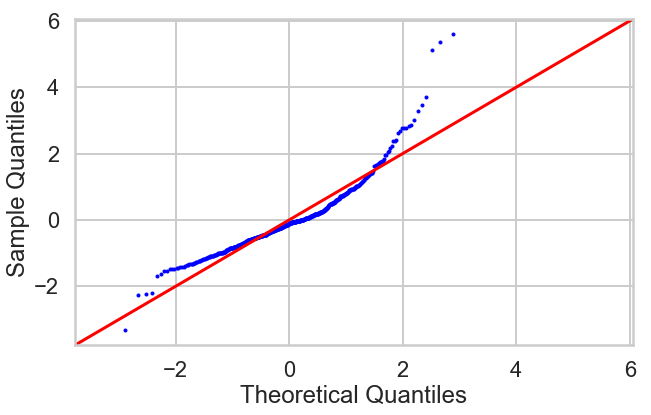

In [189]:
# Quantile plot of residuals
resid = model_some.resid
mean = np.mean(resid)
sd = np.std(resid)
z = (resid - mean) / sd
fig = sm.qqplot(z, line='45')
plt.show()

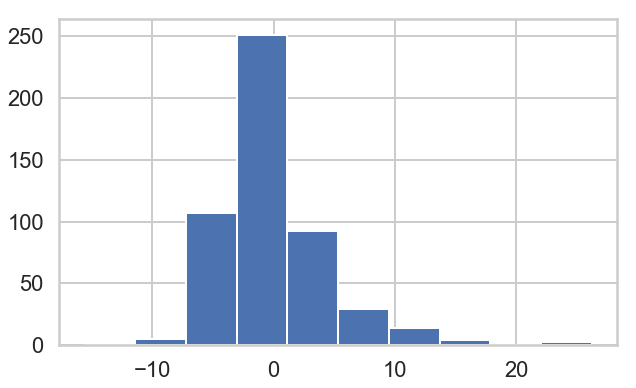

In [190]:
plt.hist(resid)
plt.show()

**Quantile plot:**

In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. The above two plots suggests that the residual distribution is normal but with some outliers.

# Advantages

**Residual vs Fitted plot**

This is used to detect the non linearity, unequal error variance and outliers.

**Quantile plot**

This is basically used to compare two probability distribution by plotting their quatiles against each other. This plot can very well detect the outliers.

# Disadvantages

**Residual vs Fitted plot**

Not very good at detecting outliers. Doesn't tell anything about the distribution of the residual.

**Quantile plot**

Takes more processing time.

In [191]:
# Find outliers #
# Bonferroni outlier test #
test = model_some.outlier_test()

print ('Bad data points (bonf(p) < 0.05):')
print (test[test['bonf(p)'] < 0.05])

Bad data points (bonf(p) < 0.05):
     student_resid       unadj_p       bonf(p)
365       4.794565  2.152677e-06  1.089254e-03
368       7.030058  6.791305e-12  3.436401e-09
369       4.664612  3.972253e-06  2.009960e-03
370       4.258146  2.461981e-05  1.245763e-02
371       5.425650  9.005087e-08  4.556574e-05
372       5.858542  8.466152e-09  4.283873e-06


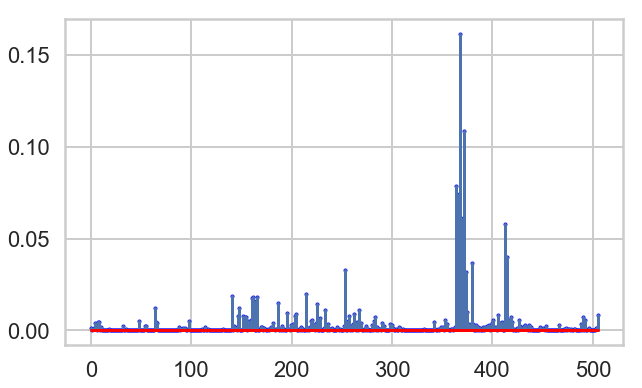

In [192]:
# Now let's try to put it into the graph.
influ = model_some.get_influence()
#c is the distance and p is p-value
(c, p) = influ.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt='bo', basefmt='r-')
plt.show()

Outliers: These outliers are observations with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem. We may want to take proper action becaused outliers may affect model's performance.

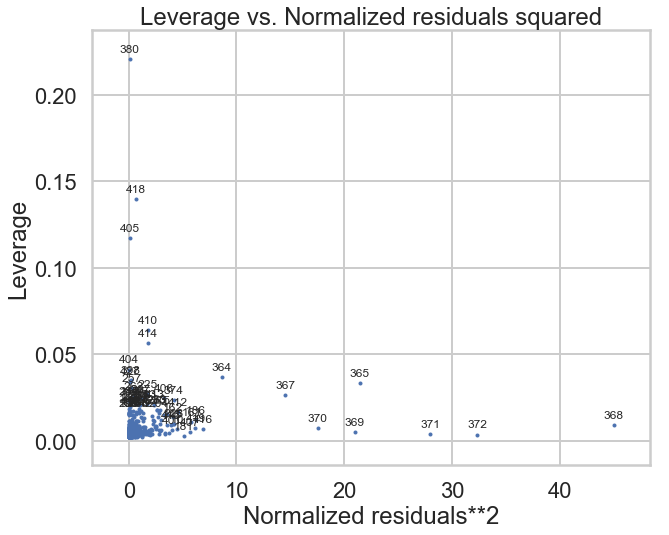

In [193]:
# Let us plot the normalized residual vs leverage.
from statsmodels.graphics.regressionplots import *
fig, ax = plt.subplots(figsize=(10,8))
fig = plot_leverage_resid2(CRP, ax=ax)

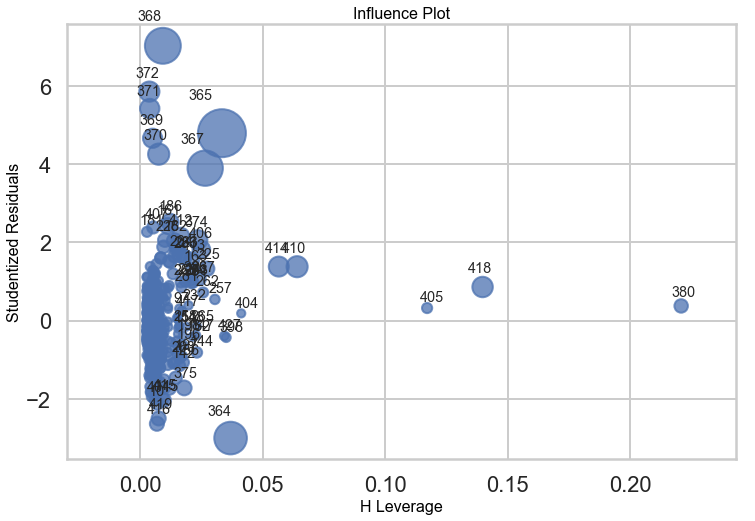

In [194]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(CRP, alpha  = 0.05, ax = ax, criterion="cooks")


High Leverage points: A data point has high leverage if it has "extreme" predictor x values. With a single predictor, an extreme x value is simply one that is particularly high or low. With multiple predictors(In our case), extreme x values may be particularly high or low for one or more predictors, or may be "unusual" combinations of predictor values (e.g., with two predictors that are positively correlated, an unusual combination of predictor values might be a high value of one predictor paired with a low value of the other predictor).

In [199]:
# getting high leverage values in high_leverage_points:
high_leverage_points = np.where(CRP.get_influence().hat_matrix_diag > 0.05)

#plt.hist(CRP.get_influence().resid_studentized_external)
# printing high leverage points
print(high_leverage_points)

(array([380, 405, 410, 414, 418], dtype=int64),)


In [200]:
# Getting high studentized residuals or outliers High_studentizes_resid:
high_studentized_resid = np.where(CRP.get_influence().resid_studentized_external > 3)

# getting all H-leverage and ouliers in one array remove:
remove = np.concatenate([high_leverage_points[0], high_studentized_resid[0]])
print(remove)

[380 405 410 414 418 365 367 368 369 370 371 372]


In [201]:
# dropping the outliers and h leverage points from the bos dataframe and storing in newbos:
newbos = bos.drop(bos.index[remove])

In [202]:
newbos.shape

(494, 15)

In [203]:
no_outliers = ols('PRICE ~ RM + CRIM + PTRATIO', newbos).fit()

In [204]:
print(no_outliers.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     423.2
Date:                Sun, 03 Feb 2019   Prob (F-statistic):          1.39e-135
Time:                        21:49:43   Log-Likelihood:                -1457.6
No. Observations:                 494   AIC:                             2923.
Df Residuals:                     490   BIC:                             2940.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7069      3.268     -2.052      0.0

C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


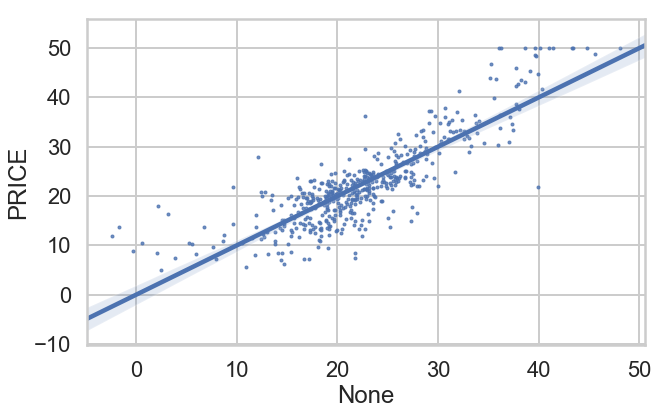

In [205]:
sns.regplot(y=newbos.PRICE, x=no_outliers.fittedvalues, data=newbos, fit_reg = True)

Model without outliers and H leverage points: As we can see from the above summary that $R^2$ value has improved from 59.3% to 72.2%. It means that the model without outliers and high leverage points perform better than models with outliers and high leverage points. AIC and BIC has also improved in model which has no outliers and high leverage point.